from https://medium.com/@orenji.eirl/hierarchical-clustering-and-networks-with-python-and-riskfolio-lib-dd3f09a5e9af

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format
# Date range
start = '2016-01-01'
end = '2019-12-30'
# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()
# Downloading data
data = yf.download(assets, start = start, end = end)


[                       0%%                      ]

[                       0%%                      ]

[******                12%%                      ]  3 of 25 completed

[********              16%%                      ]  4 of 25 completed

[********              16%%                      ]  4 of 25 completed

[************          24%%                      ]  6 of 25 completed

[************          24%%                      ]  6 of 25 completed

[***************       32%%                      ]  8 of 25 completed

[*****************     36%%                      ]  9 of 25 completed

[*******************   40%%                      ]  10 of 25 completed

[*******************   40%%                      ]  10 of 25 completed

[**********************48%%                      ]  12 of 25 completed

[**********************52%%                      ]  13 of 25 completed

[**********************56%%*                     ]  14 of 25 completed

[**********************60%%***                   ]  15 of 25 completed

[**********************64%%*****                 ]  16 of 25 completed

[**********************68%%*******               ]  17 of 25 completed

[**********************68%%*******               ]  17 of 25 completed

[**********************76%%**********            ]  19 of 25 completed

[**********************80%%************          ]  20 of 25 completed

[**********************84%%**************        ]  21 of 25 completed

[**********************88%%****************      ]  22 of 25 completed

[**********************92%%******************    ]  23 of 25 completed

[**********************96%%********************  ]  24 of 25 completed

[*********************100%%**********************]  25 of 25 completed

In [2]:
data.head()

Adj Close                                                          \
                  APA          BA        BAX        BMY      CMCSA        CNP   
Date                                                                            
2016-01-04 3777.1763% 12600.5112% 3340.9763% 5312.6434% 2357.6456% 1382.9149%   
2016-01-05 3700.6630% 12651.6319% 3354.4579% 5417.2630% 2358.0694% 1395.7831%   
2016-01-06 3275.5932% 12450.7408% 3362.5477% 5322.1535% 2339.8493% 1378.3731%   
2016-01-07 3107.2653% 11928.7819% 3306.8199% 5174.7349% 2314.0015% 1351.1236%   
2016-01-08 3115.7679% 11657.9399% 3253.7880% 5043.1667% 2316.5436% 1348.0961%   

                                                       ...   Volume           \
                  CPB         DE       HPQ        JCI  ...       NI     PCAR   
Date                                                   ...                     
2016-01-04 4059.8404% 6652.3376% 907.7955% 2440.2458%  ...  2592700  4318500   
2016-01-05 4074.7715% 6690.8104% 916.4038% 2411.0758%  ...  3138800  3235200   
2016-01-06 4067.6991% 6615.6151% 883.5353% 2388.0474%  ...  3525700  4285350   
2016-01-07 4018.0454% 6557.0305% 842.8411% 2327.4069%  ...  3047600  4433850   
2016-01-08 4040.9740% 6449.4804% 827.9717% 2323.5682%  ...  2933800  4197600   

                                                                              \
                PSA      SEE         T       TGT      TMO      TXT        VZ   
Date                                                                           
2016-01-04  1220900  1697500  42076058   8233300  3287500  1658200  17821600   
2016-01-05   776000  1307300  40656465   8191400  3184400  1514400  15632800   
2016-01-06   589800  1116500  35631223   4921400  2300800  2258000  19082700   
2016-01-07   633700  1541500  46487494  11289900  2470900  2192900  19277600   
2016-01-08   600600  2144600  37192219   7749000  2148100  3436000  16594800   

                     
               ZION  
Date                 
2016-01-04  3523300  
2016-01-05  2653600  
2016-01-06  4164200  
2016-01-07  4234000  
2016-01-08  3401600  

[5 rows x 150 columns]

In [3]:
#data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
data.head()

ValueError: Length mismatch: Expected axis has 150 elements, new values have 25 elements

In [12]:
data.describe()

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
count,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,...,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%,100400.0000%
mean,3755.4034%,25366.1775%,5786.1248%,4750.7439%,3248.5982%,2225.5483%,4037.4575%,11887.3382%,1566.8274%,3338.2594%,...,2111.5921%,3521.9282%,17481.6464%,3985.3378%,1720.8885%,6534.0002%,20195.7283%,4963.0859%,3920.1023%,3631.0302%
std,957.4823%,9981.5591%,1378.7449%,531.4457%,457.6813%,338.1613%,660.4597%,3123.2331%,363.4049%,345.9446%,...,246.7568%,494.4644%,1576.5829%,307.2226%,150.8180%,1576.2380%,5290.2214%,918.8028%,497.4698%,842.1962%
min,1726.8820%,9815.2580%,3124.3542%,3734.8866%,2269.0857%,1288.5284%,2751.1234%,6276.3512%,705.8892%,2288.2580%,...,1522.4489%,2265.3322%,14266.8564%,2838.1889%,1383.6096%,4268.0889%,11931.8314%,3074.0116%,3023.8575%,1639.8048%
25%,3100.6968%,14600.6500%,4352.8180%,4363.2205%,2886.6277%,1984.7817%,3461.3801%,9297.0333%,1248.1797%,3101.4711%,...,1929.1356%,3225.0652%,16357.3910%,3870.0136%,1606.1481%,5568.8925%,15162.9807%,4473.8319%,3544.1298%,3367.7541%
50%,3811.5461%,28280.5405%,5930.1319%,4620.9625%,3227.8484%,2305.1235%,4058.2197%,12743.3338%,1651.7428%,3361.8620%,...,2109.6478%,3548.7583%,17055.9738%,4037.0434%,1709.3026%,6268.0880%,19356.0242%,4844.1656%,3739.0150%,3811.9028%
75%,4385.0766%,34313.8855%,6885.1187%,5148.0616%,3536.5561%,2453.5188%,4629.8973%,14591.4455%,1829.9702%,3570.3095%,...,2287.9787%,3849.9575%,18383.4023%,4177.9174%,1808.2037%,7131.8781%,23919.1883%,5432.0441%,4426.3721%,4279.2342%
max,5843.4975%,43029.9988%,8400.8842%,6153.3199%,4250.9697%,2745.8570%,5366.7110%,17027.5543%,2247.9944%,4046.0140%,...,2667.2598%,4822.4949%,22124.1959%,4693.5238%,2173.1615%,11973.8457%,32522.6349%,7176.5457%,5024.7284%,4961.4090%


NameError: name 'Y' is not defined

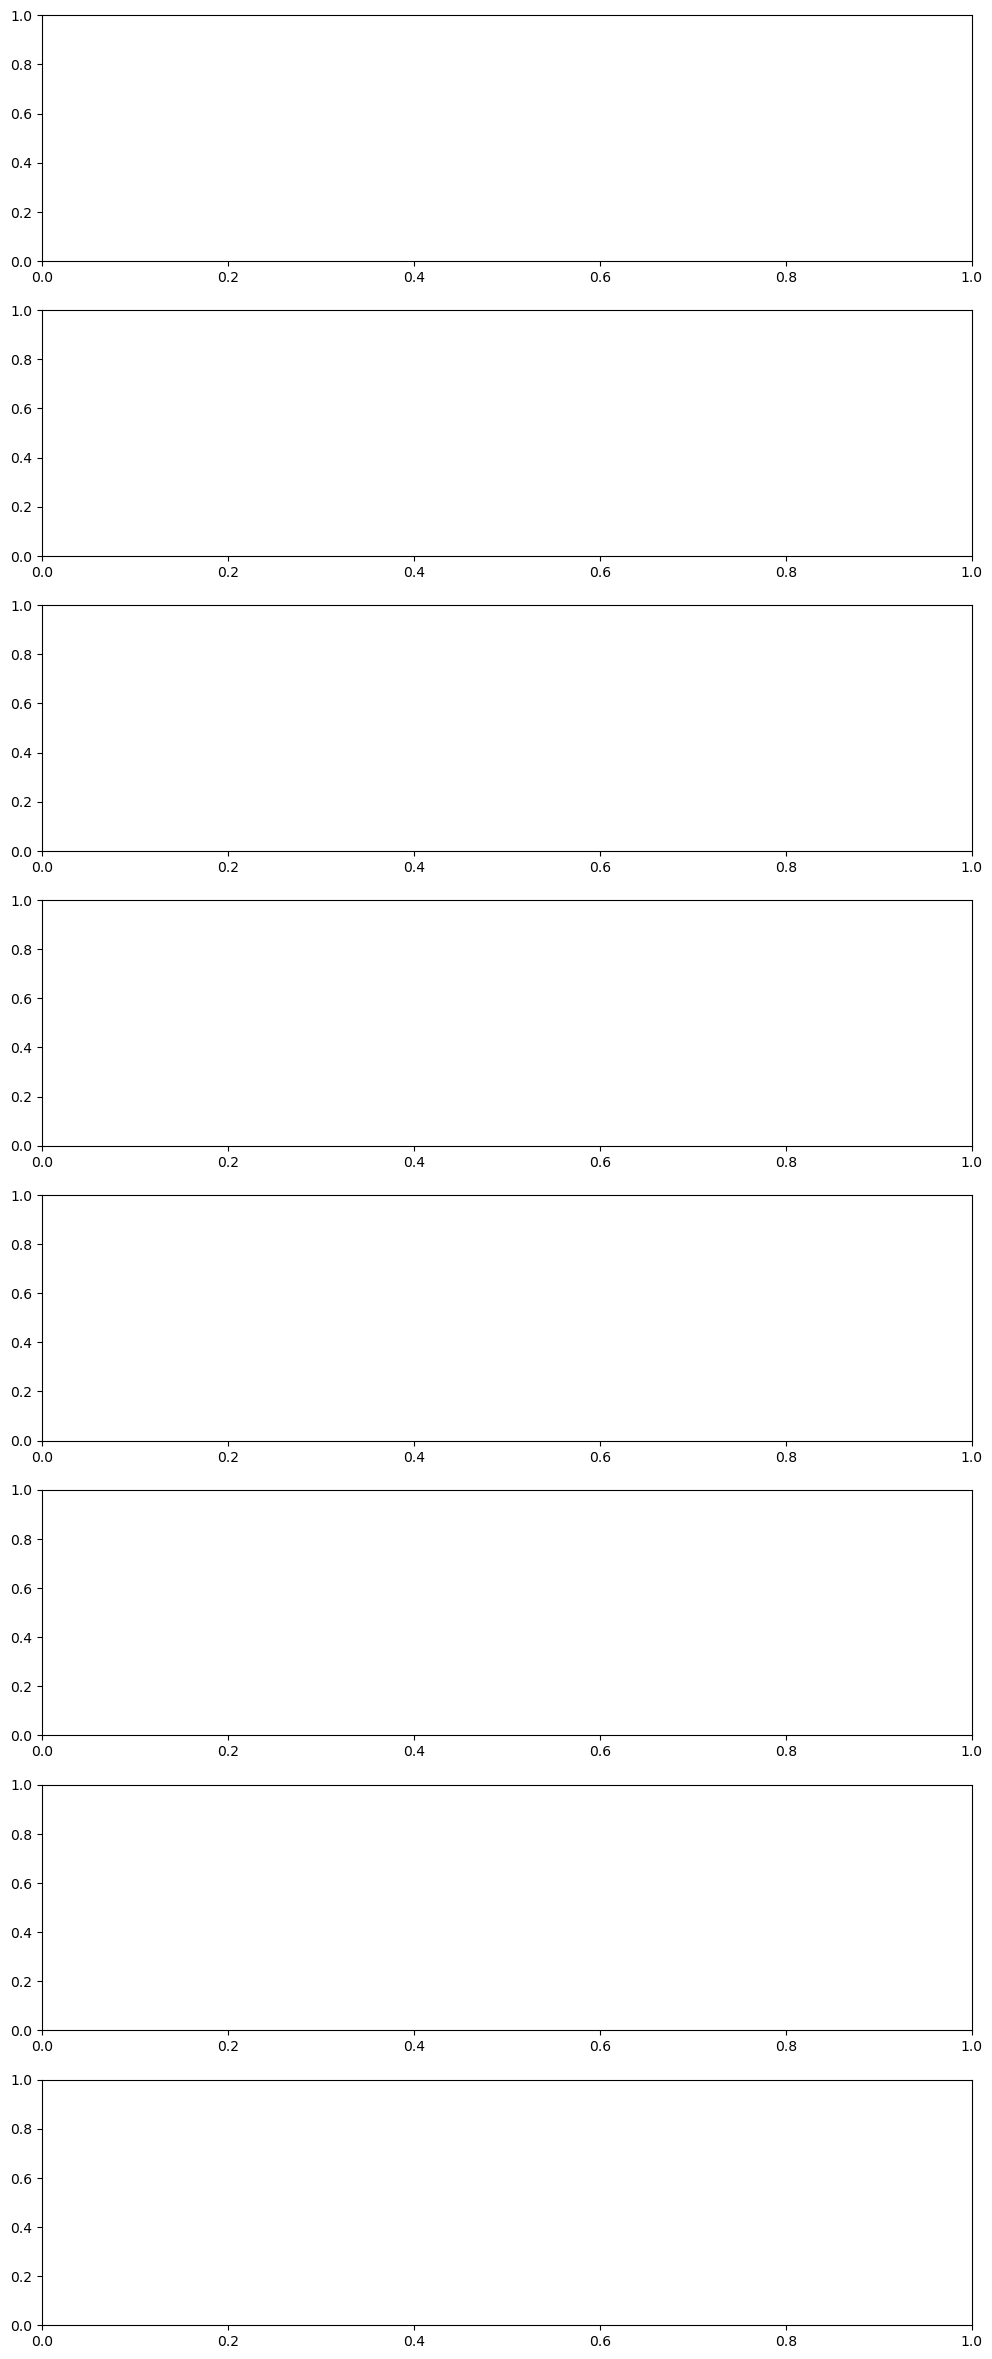

In [13]:
import matplotlib.pyplot as plt
import riskfolio as rp
# Comparison of several linkages methods
linkages = ['single','complete','average','weighted',
            'centroid', 'median', 'ward','DBHT']
fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)
j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='pearson',
                               linkage=i,
                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

In [ ]:
# Comparison of two network graphs
linkages = ['ward','DBHT']
fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)
j = 0
for i in linkages:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage=i,
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind='spring',
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

In [ ]:
# Comparison of several network layouts
kinds =['spring','kamada','planar','circular']
fig, ax = plt.subplots(len(kinds), 1, figsize=(12, 30))
ax = np.ravel(ax)
j = 0
for i in kinds:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage="DBHT",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind=i,
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

In [ ]:
# Getting components of each cluster
clusters = rp.assets_clusters(returns=Y,
                              codependence='pearson',
                              linkage='DBHT',
                              k=None,
                              max_k=10,
                              leaf_order=True)
display(clusters.sort_values(by='Clusters'))